**To explore supervised machine learning**

*Import required Libraries*

In [44]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

*Read the data from remote link*

In [45]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(url) #read data from url and store in dataframe 'data'
print("Data imported successfully")


Data imported successfully


In [46]:
#print head of data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


*Explore the data*

In [47]:
data.shape

(25, 2)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [49]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


*Visualize the data*

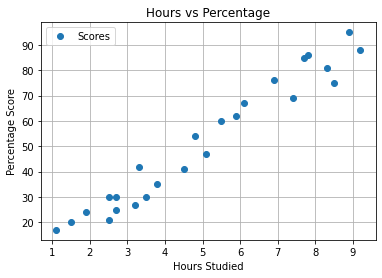

In [50]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

*Prepare the data*

In [51]:
#split the data into input and output values
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [52]:
#split the data into training and testing datasets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)



*Train the Linear-Regression model using training dataset*

In [53]:
#import LinearRegression model from sklearn
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  #create object for linear-regression
regressor.fit(X_train, y_train) #fit the model using training dataset

print("Training complete.")

Training complete.


*Plot the regression line*

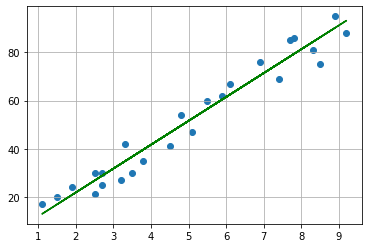

In [54]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='green')
plt.grid()
plt.show()

*Predict the data*

In [55]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [56]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Text(0, 0.5, 'Scores')

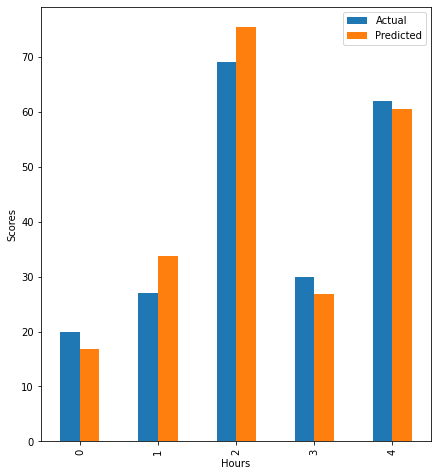

In [57]:
df.plot(kind='bar',figsize=(7,8))
plt.xlabel("Hours")
plt.ylabel("Scores")

In [58]:
#testing own data
hours=[[6.75],[9.80]]
score=regressor.predict(hours)
score

array([68.91509129, 99.14259355])

*Find Accuracy of model*

In [59]:
regressor.score(X_test,y_test)

0.9454906892105354

*Measuring performance of model using MSE,MAE,RMSE*

In [60]:
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Absolute Error: ",np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))




Mean Absolute Error:  4.183859899002982
Mean Squared Error:  21.598769307217456
Root Mean Absolute Error:  2.0454485813637513


*Predict score of a student studying for 9.25 hours*

In [62]:
study_hour=9.25
predic_score=regressor.predict([[study_hour]])
print("Predicted Score of a student studying for 9.25 hours in a day: ",predic_score)

Predicted Score of a student studying for 9.25 hours in a day:  [93.69173249]
